In [ ]:
import os
print(os.listdir('../input/fer2013'))

['test', 'train']


In [ ]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
# from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam,Adamax,RMSprop,SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train_dir ='../input/fer2013/train'
test_dir  ='../input/fer2013/test'

In [ ]:
print('Train Directory :')
print(os.listdir('../input/fer2013/train'))

Train Directory :
['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [ ]:
print("Test_Directory :")
print(os.listdir('../input/fer2013/test'))

Test_Directory :
['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [ ]:
print('Count of Images in Training Set: ')
for exp in os.listdir(train_dir):
    print(str(len(os.listdir(train_dir+'/'+exp)))+" "+exp+" "+"images")

Count of Images in Training Set: 
3171 surprise images
4097 fear images
3995 angry images
4965 neutral images
4830 sad images
436 disgust images
7215 happy images


In [ ]:
print('Count of Images in Testing Set: ')
for exp in os.listdir(test_dir):
    print(str(len(os.listdir(test_dir+'/'+exp)))+" "+exp +" "+"images")

Count of Images in Testing Set: 
831 surprise images
1024 fear images
958 angry images
1233 neutral images
1247 sad images
111 disgust images
1774 happy images


In [ ]:
import matplotlib.pyplot as plt
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]

    plt.figure(figsize=(10, 10))

    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()
        plt.imshow(img, cmap='gray')

## Train Images

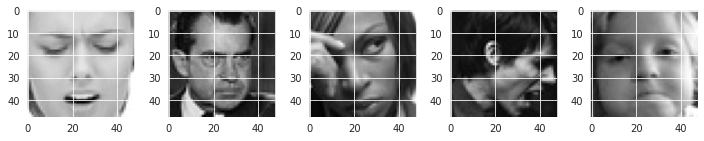

In [ ]:
plot_images(train_dir+"/"+"angry")

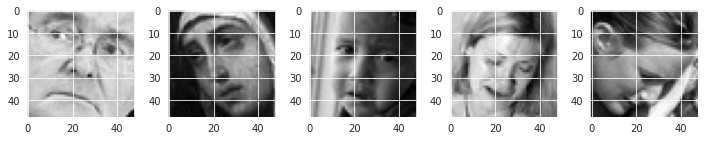

In [ ]:
plot_images(train_dir+"/"+"sad")

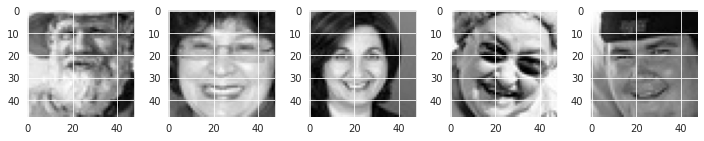

In [ ]:
plot_images(train_dir+"/"+"happy")

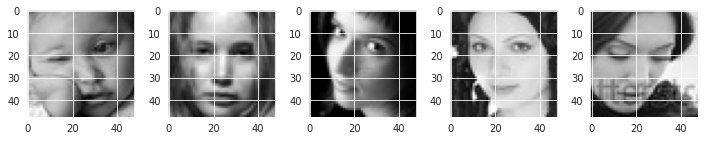

In [ ]:
plot_images(train_dir+"/"+"neutral")

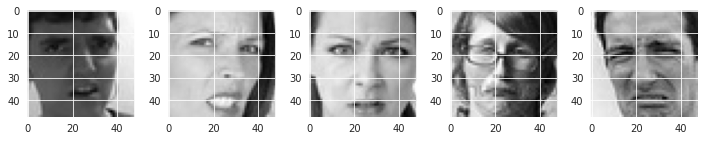

In [ ]:
plot_images(train_dir+"/"+"disgust")

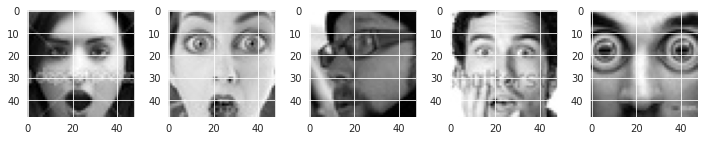

In [ ]:
plot_images(train_dir+"/"+"surprise")

In [ ]:
img_size = 48 #original size of the image

In [ ]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


## Modeling

In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
epochs = 60
batch_size = 64

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      

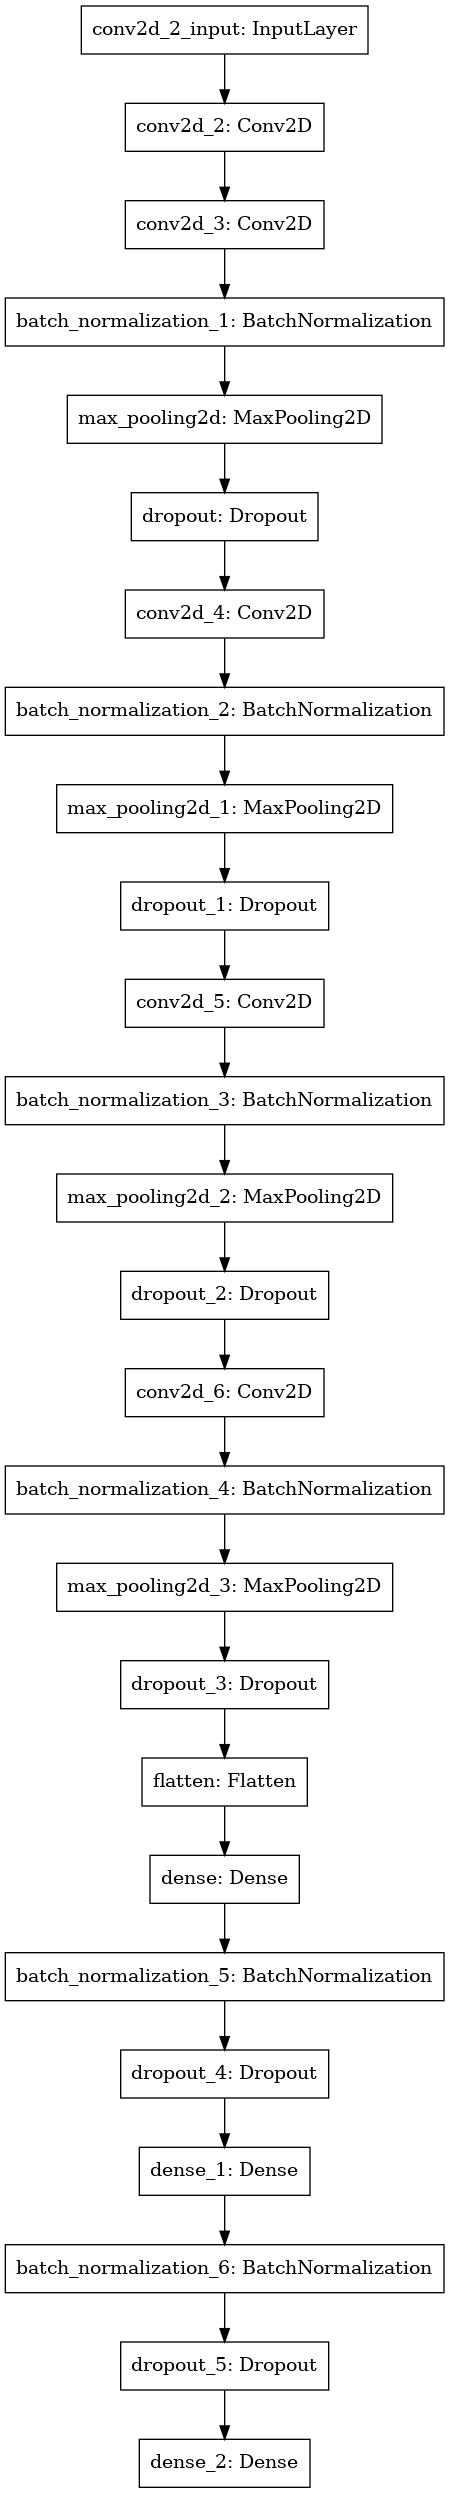

In [ ]:
plot_model(model)

In [ ]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60
359/359 [==============================] - 112s 289ms/step - loss: 9.5884 - accuracy: 0.1831 - val_loss: 8.7541 - val_accuracy: 0.1816
Epoch 2/60
359/359 [==============================] - 35s 97ms/step - loss: 8.5125 - accuracy: 0.2192 - val_loss: 7.6063 - val_accuracy: 0.2626
Epoch 3/60
359/359 [==============================] - 35s 99ms/step - loss: 7.5063 - accuracy: 0.2462 - val_loss: 6.5426 - val_accuracy: 0.3122
Epoch 4/60
359/359 [==============================] - 37s 104ms/step - loss: 6.5230 - accuracy: 0.2686 - val_loss: 5.6838 - val_accuracy: 0.3310
Epoch 5/60
359/359 [==============================] - 37s 103ms/step - loss: 5.6285 - accuracy: 0.3049 - val_loss: 4.8582 - val_accuracy: 0.3701
Epoch 6/60
359/359 [==============================] - 35s 98ms/step - loss: 4.8291 - accuracy: 0.3289 - val_loss: 4.3148 - val_accuracy: 0.3638
Epoch 7/60
359/359 [==============================] - 34s 95ms/step - loss: 4.1764 - accuracy: 0.3452 - val_loss: 3.6685 - val_accur

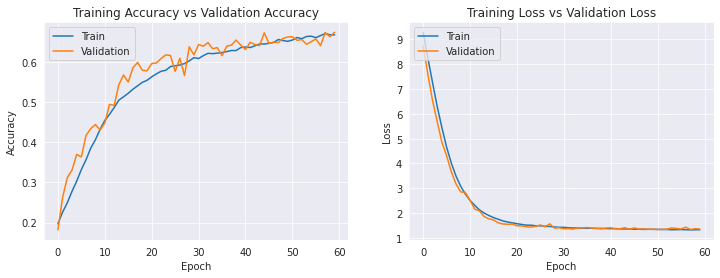

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save('model_optimal.h5')

In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 1s 59ms/step - loss: 1.3576 - accuracy: 0.6753
final train accuracy = 71.20 , validation accuracy = 67.53


In [ ]:
Emotion_Classes = ['Angry',
                  'Disgust',
                  'Fear',
                  'Happy',
                  'Neutral',
                  'Sad',
                  'Surprise']

In [ ]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=(img_size,img_size),
    color_mode="grayscale",
    shuffle=True,
    batch_size=64,
)

Found 7178 images belonging to 7 classes.


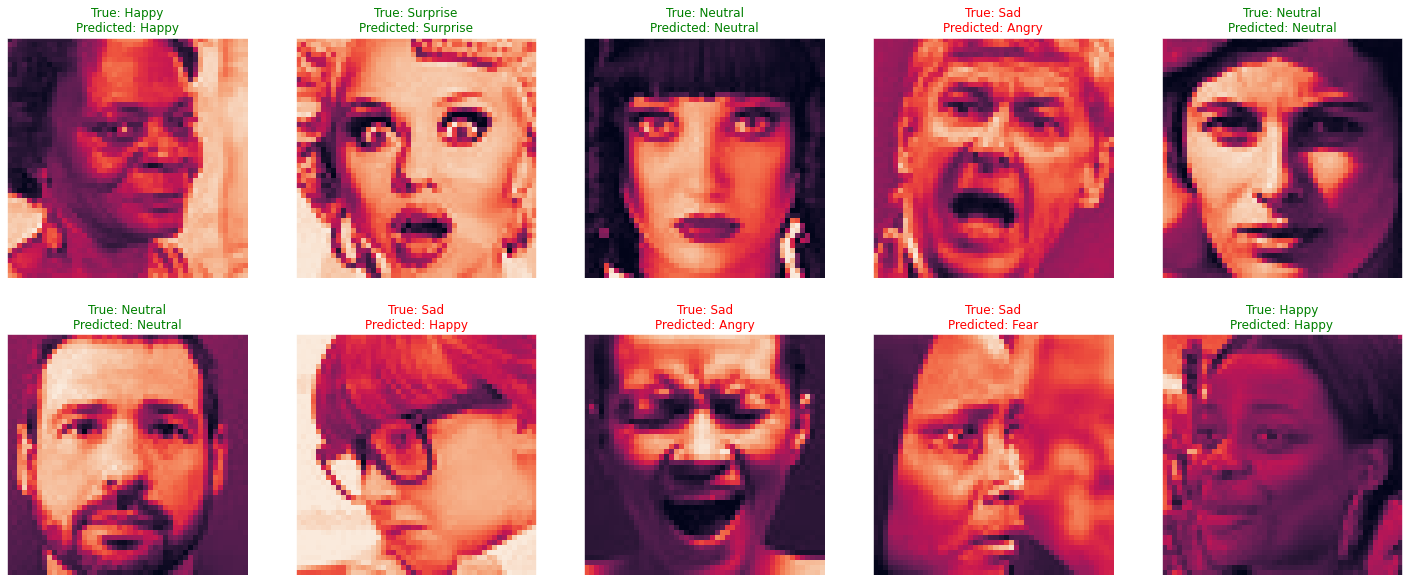

<Figure size 432x288 with 0 Axes>

In [ ]:
Random_batch = np.random.randint(0, len(test_generator) - 1)
Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])
    Model_Prediction = np.argmax(model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))
    ax.imshow(Random_Img)
    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()